# SIMPLE LINEAR REGRESSION


In [30]:
# Importing Libraries
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt 

# If you're using Jupyter Notebook:
# %matplotlib inline            ------->  Displays graphs inline in the notebook


In [39]:
#importing the dataset 
df=pd.read_csv(r"D:\STUDY\concrete_data.csv")

### working on data


In [40]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [42]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [43]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


In [37]:
print("\n column data type")
df.dtypes


 column data type


cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object


 correlation 
                Height(Inches)  Weight(Pounds)
Height(Inches)        1.000000        0.502859
Weight(Pounds)        0.502859        1.000000


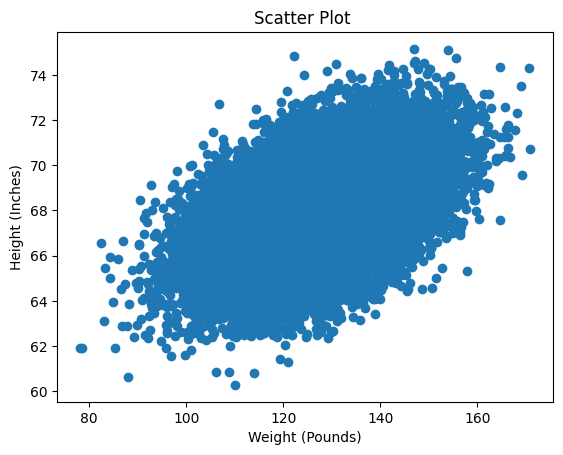

In [26]:
## scatter plot
plt.scatter(df["Weight(Pounds)"],df["Height(Inches)"])
plt.xlabel("Weight (Pounds)")
plt.ylabel("Height (Inches)")
plt.title("Scatter Plot ")
plt.show()

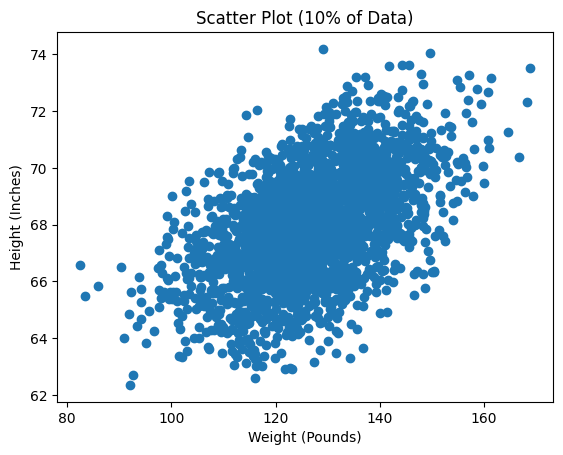

In [27]:
#plot for 10% values
df_ten_percent=df.sample(frac=0.1 , random_state= 42)
plt.scatter(df_ten_percent["Weight(Pounds)"], df_ten_percent["Height(Inches)"])
plt.xlabel("Weight (Pounds)")
plt.ylabel("Height (Inches)")
plt.title("Scatter Plot (10% of Data)")
plt.show()

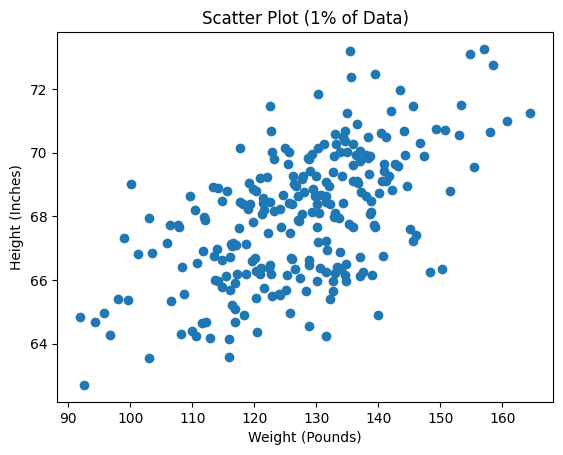

In [29]:
#1percent of data
df_one_percent=df.sample(frac=0.01 , random_state= 42)
plt.scatter(df_one_percent["Weight(Pounds)"], df_one_percent["Height(Inches)"])
plt.xlabel("Weight (Pounds)")
plt.ylabel("Height (Inches)")
plt.title("Scatter Plot (1% of Data)")
plt.show()

In [38]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


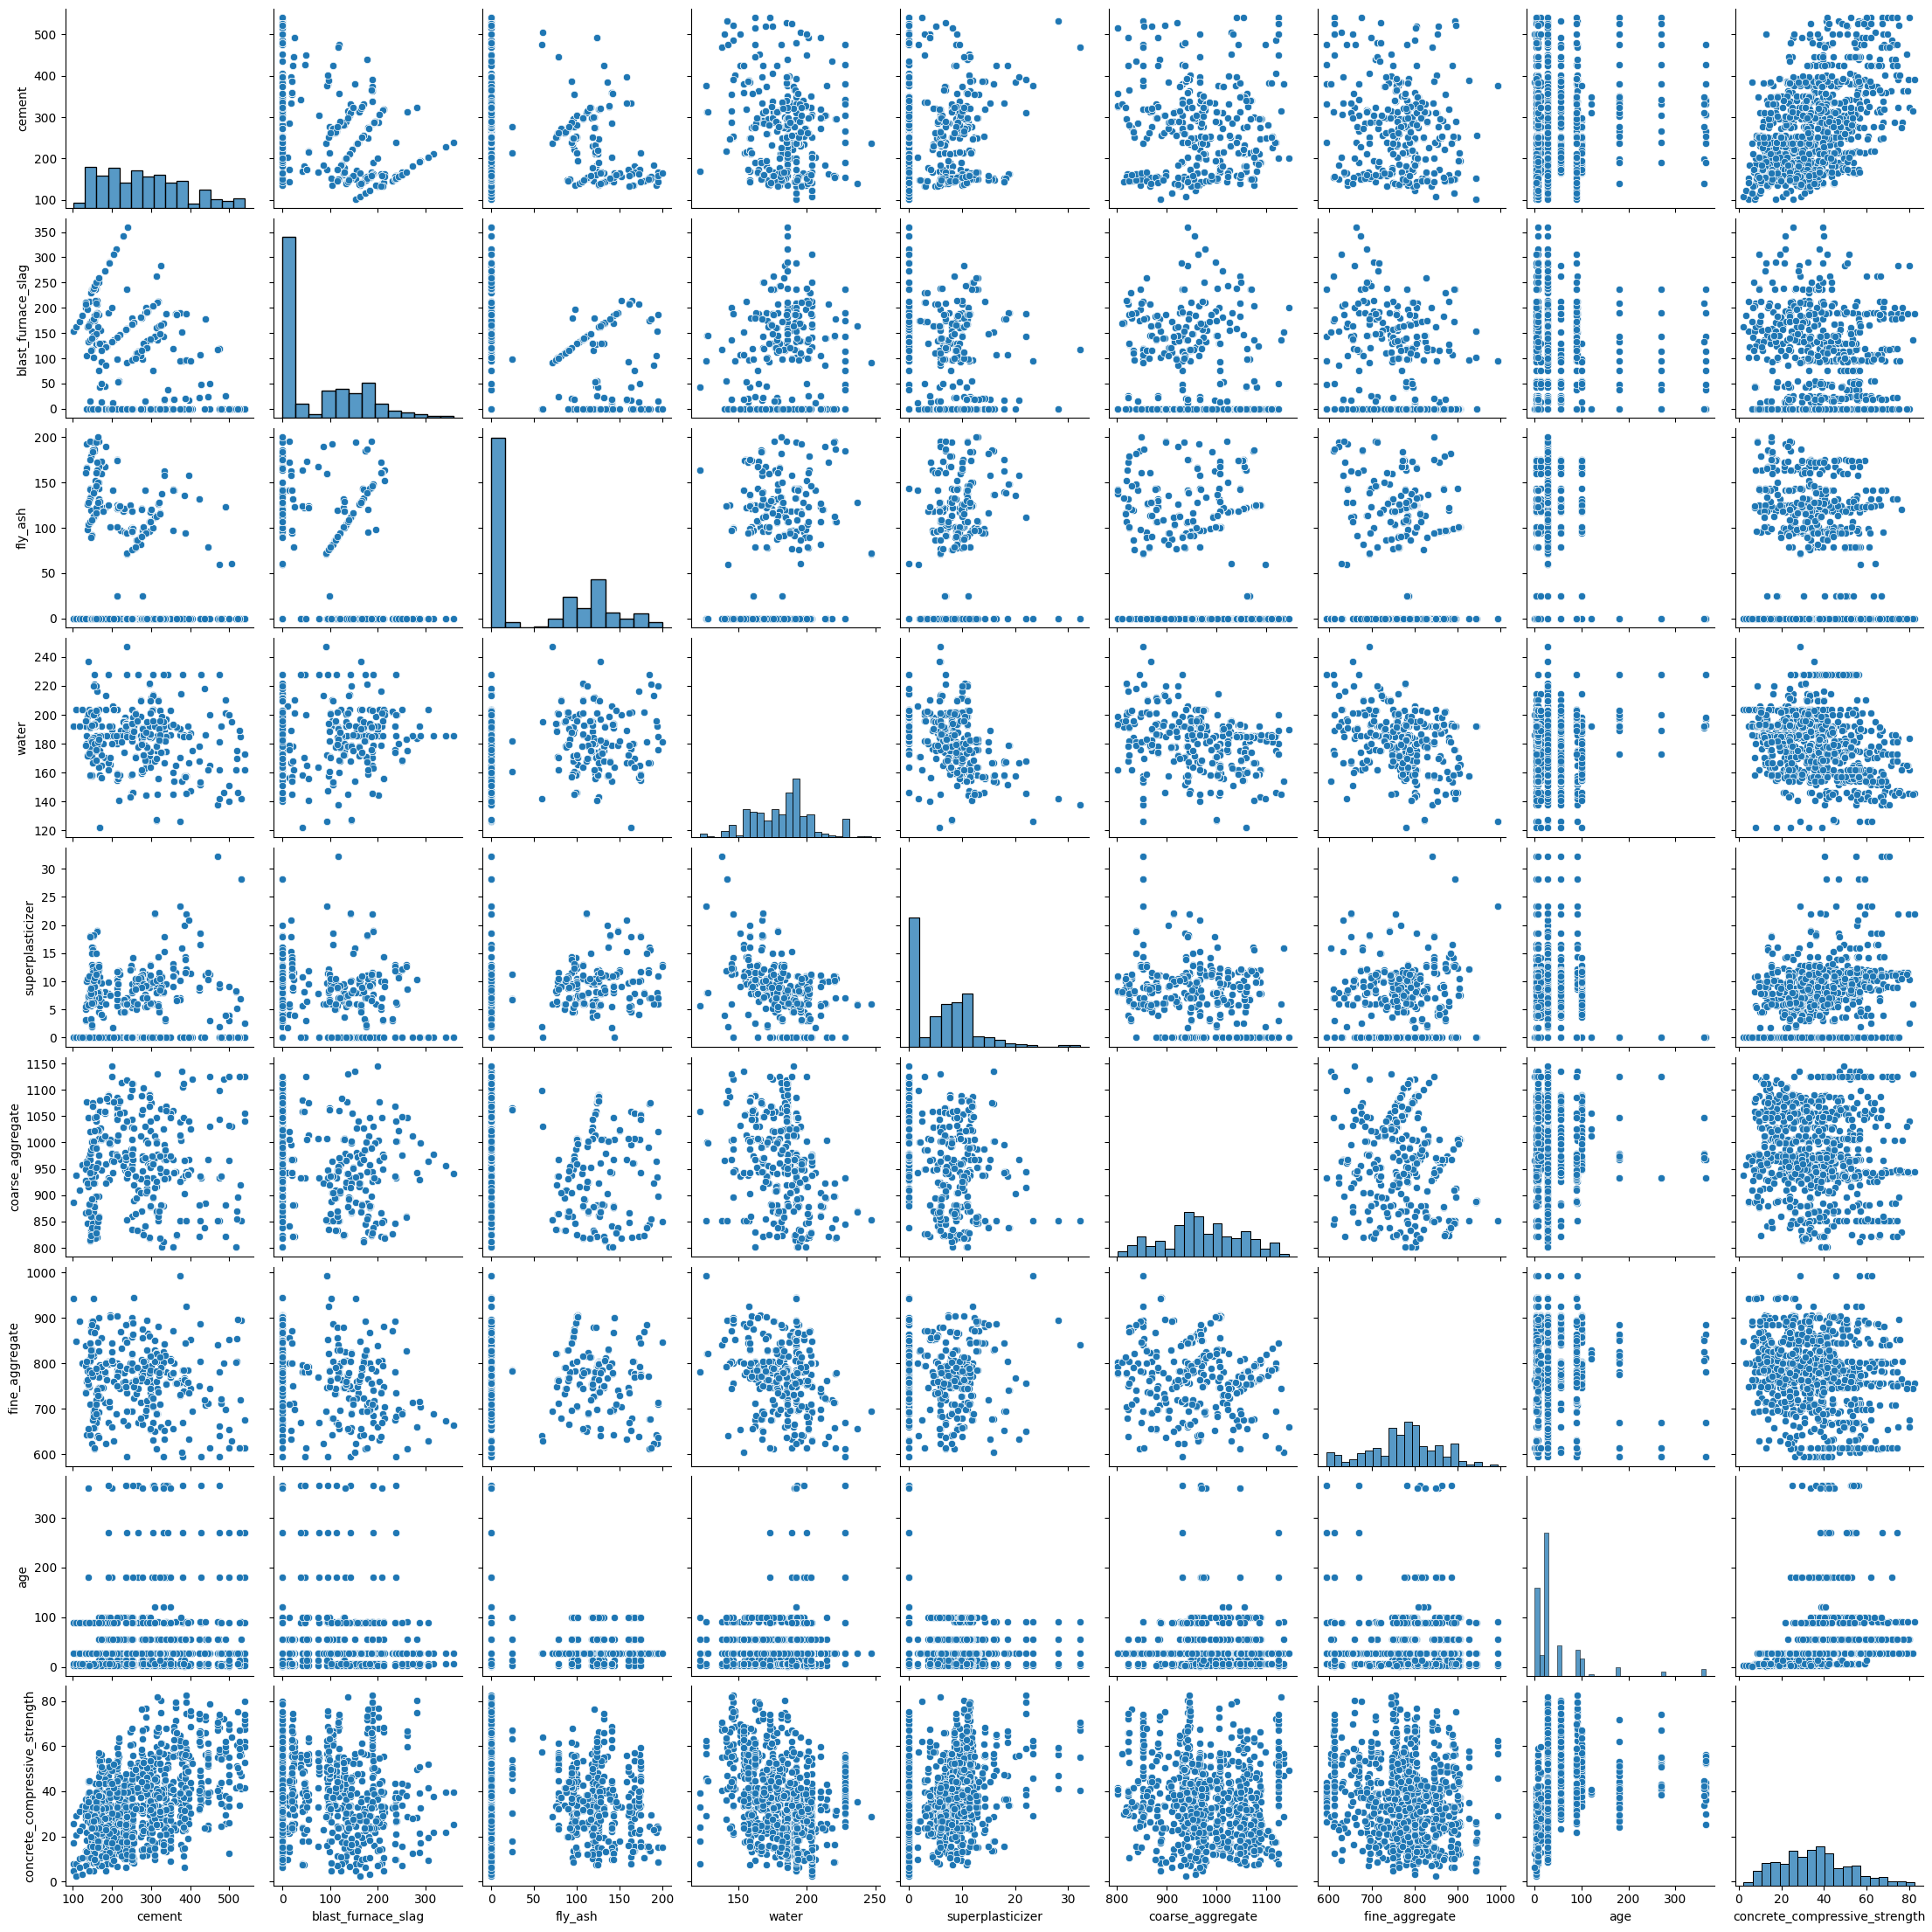

In [44]:
import seaborn as sns
sns.pairplot(df)

In [46]:
x = df.drop(columns=['concrete_compressive_strength'])
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [47]:
y=df["concrete_compressive_strength"]
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [49]:
x.shape

(1030, 8)

In [51]:
y.shape

(1030,)

In [52]:
type(x)

pandas.core.frame.DataFrame

In [56]:
#tarin teset split
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2, random_state=42)



In [58]:
print(x_train.shape,
x_test.shape,
type(x_test))

(824, 8) (206, 8) <class 'pandas.core.frame.DataFrame'>


In [59]:
## standardisation
from sklearn.preprocessing import StandardScaler


In [62]:
scaler=StandardScaler()
# Fit the scaler on the training data
x_train_scal = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scal = scaler.transform(x_test)

In [63]:
#apply linear regression 
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train_scal,y_train)

LinearRegression(n_jobs=-1)

In [64]:
regression.coef_

array([12.78841262,  9.43445595,  5.25457769, -2.88259683,  1.85212598,
        1.40519554,  1.9505291 ,  7.03743401])

In [66]:
regression.intercept_

np.float64(35.8578640776699)

In [67]:
regression.rank_

8

In [ ]:
#pllotiing tarining data for best fit line 
plt

In [68]:
type(x_train_scal)

numpy.ndarray

In [69]:
type(y_train)

pandas.core.series.Series

In [70]:
y_train=np.array(y_train)

In [73]:
x_train_scal.shape


(824, 8)

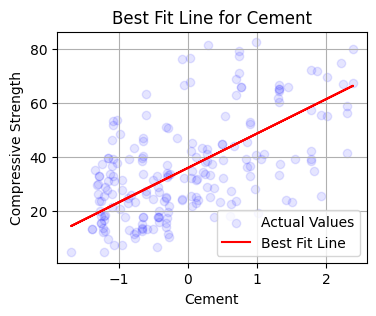

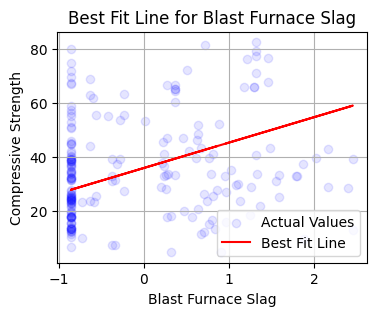

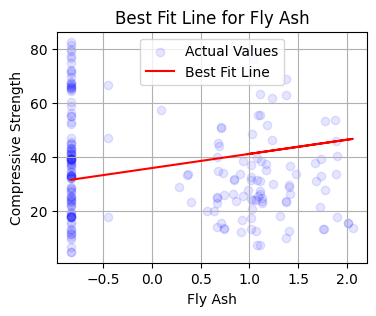

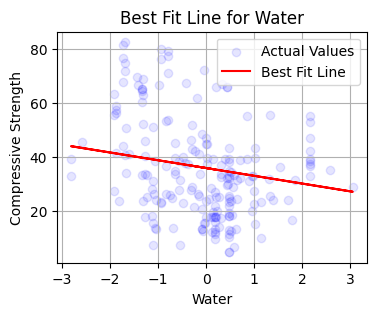

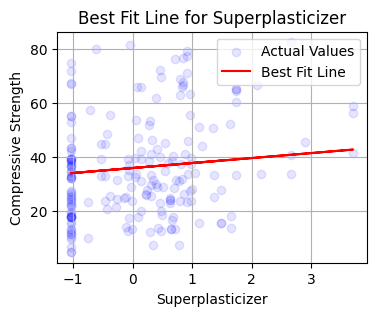

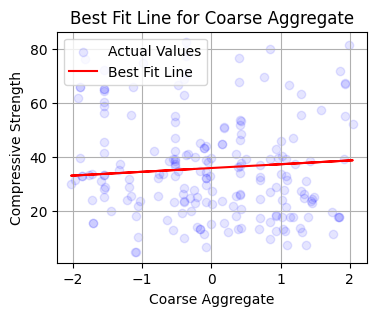

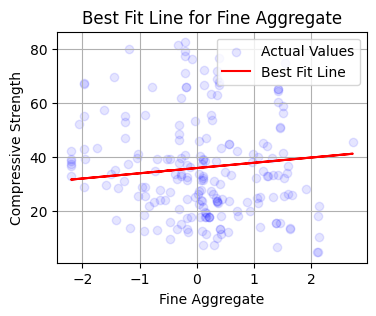

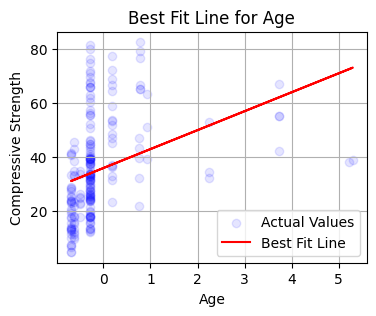

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Slopes for each feature
slopes = np.array([12.78841262, 9.43445595, 5.25457769, -2.88259683, 
                   1.85212598, 1.40519554, 1.9505291, 7.03743401])

# Intercept
intercept = 35.8578640776699

# Feature names (corresponding to the slopes)
feature_names = [
    "Cement", "Blast Furnace Slag", "Fly Ash", "Water", 
    "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age"
]

# Extract the first 30 rows of the scaled training data
x_sample = x_train_scal[:200]

# Extract the first 30 target values
y_sample = y_train[:200]

# Plot best-fit line for each feature in separate figures
for i, slope in enumerate(slopes):
    # Predicted values for the feature using the slope and intercept
    y_pred = x_sample[:, i] * slope + intercept

    # Create a new figure for each feature
    plt.figure(figsize=(4, 3))
    
    # Scatter plot of actual vs feature values
    plt.scatter(x_sample[:, i], y_sample, color="blue", alpha=1, label="Actual Values",s=1)
    
    # Line plot for the best-fit line
    plt.plot(x_sample[:, i], y_pred, color="red", label="Best Fit Line")
    
    # Add labels, title, and legend
    plt.title(f"Best Fit Line for {feature_names[i]}")
    plt.xlabel(feature_names[i])
    plt.ylabel("Compressive Strength")
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()


